- na straně 154
- záleží na výběru 1. obrazu

- tohle je asi stále blbě - proč to ukazuje tolik maxim? 


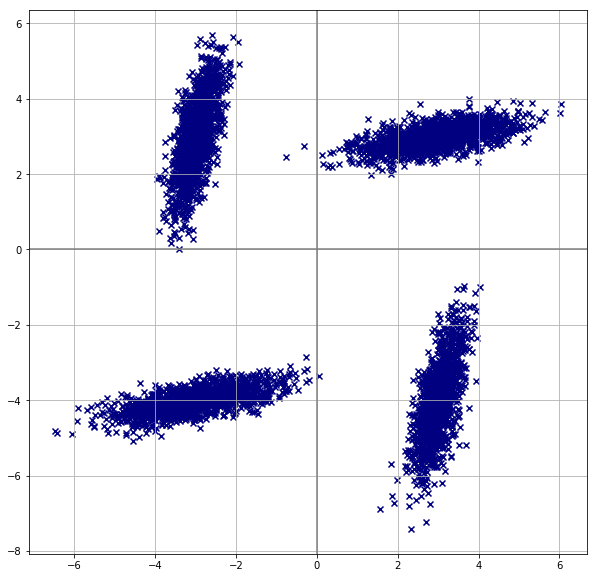

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tools import dist_m

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data.txt', delimiter=' ')
data_len = len(data)

plt.scatter(data[:,0],data[:,1], color='navy', marker='x')
plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')

d = np.full([data_len-1], np.nan)

In [60]:
a = np.linalg.norm(data, axis=1)
#print(a)
#print(data[0])
print(np.amax(data, axis=0))
print(np.argmax(np.linalg.norm(data, axis=1)))

[6.046712 5.687208]
4963


[ 0.71032766  0.75547417  0.78826886  0.80032121  0.80377882  0.81072419
  0.85019536  1.05469141  1.43552927  1.54351464  1.73284497  1.73609592
  1.74671673  2.07992628  3.34974506  3.36535794  4.05935935  5.44403694
  6.5755951  16.03779499]
[-1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  1  1  1]
2


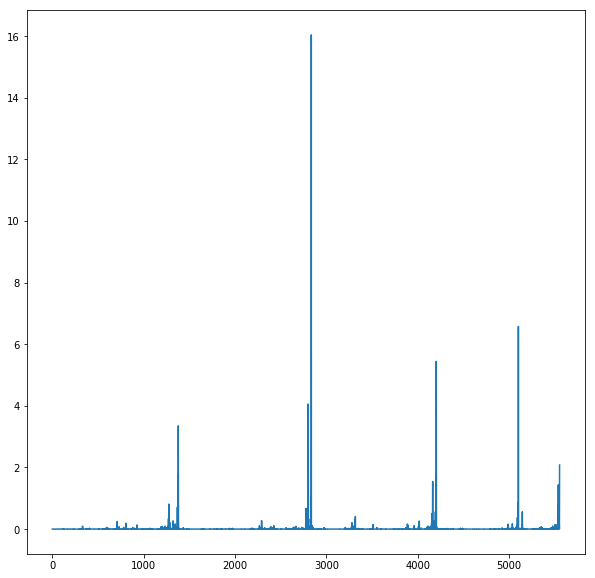

In [69]:
# matice vzdáleností
dist_matrix = dist_m(data)

# řádek vybírat náhodně
sel_row = np.random.randint(data_len)  #19 JE DOCELA VHODNÁ

for i in range(0,data_len-1):
    min_ind = np.nanargmin(dist_matrix[sel_row,:], axis=None)
    d[i] =  dist_matrix[sel_row,min_ind]
    dist_matrix[sel_row,:] = np.inf
    dist_matrix[:,sel_row] = np.inf
    sel_row = min_ind
    
plt.plot(d)
print(np.sort(d)[-20:])
#stanovení počtu tříd
#h_dist = np.floor(np.log10(np.sort(d))).astype(int)
print(h_dist[-20:])
d_sort = np.sort(d)
cl_nb = len(d_sort[d_sort>=10])+1 #+1 protože top číslo je vzdálenost 2 tříd, všechny nižší jednu přidávaj
print(cl_nb)



In [100]:
ind = np.partition(d, -7)[-7:]
print(ind)

[ 3.36535794  4.01088475  4.05935935 13.01389772 16.03779499 99.00952414
 22.92594777]


[ 1.32782801  1.6804043   2.38546145  3.09348576  4.18789224  4.84412989
  6.94469037 16.85520823 20.34566378 25.56615581]


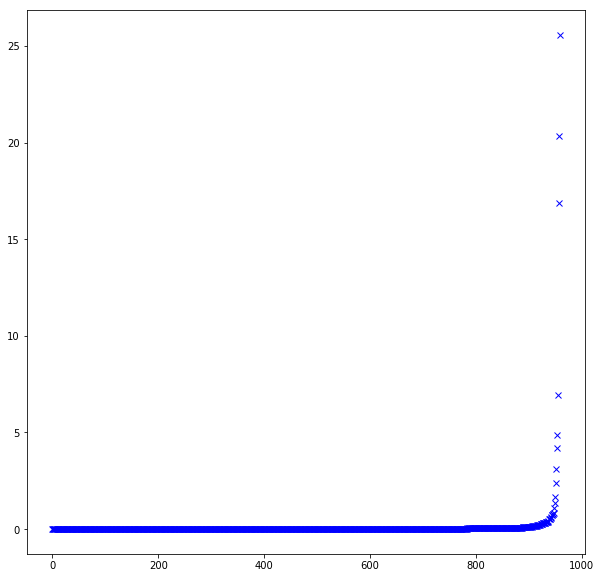

In [45]:
d = np.sort(d)
plt.plot(d,'bx')
print(d[-10:])